In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

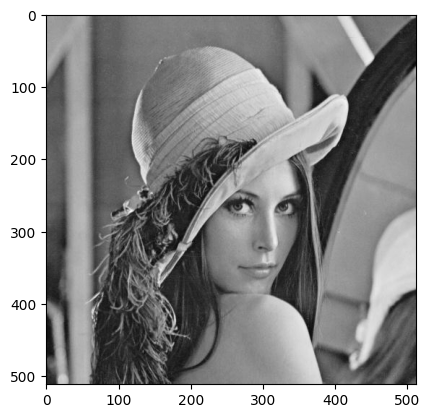

In [66]:
lena = cv.imread("lena.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(lena, cmap="gray")
plt.show()

# Filtrage Fréquentiel

In [67]:
def subp(id, title, data): 
    plt.subplot(id), plt.imshow(data, cmap='gray'), plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

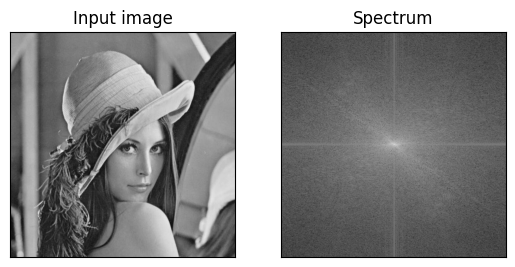

In [68]:
def spectre_fourier(im):
    # Step 1 : compute the DFT
    dft = np.fft.fft2(im)

    # Step 2 : shift the zero-frequncy component to the center of the spectrum
    dft_shift = np.fft.fftshift(dft)

    # Step 3 : compute the magnitude of the spectrum
    return dft_shift, np.log(np.abs(dft_shift))


spectre, spectre_clean = spectre_fourier(lena)

subp(121, "Input image", lena)
subp(122, "Spectrum", spectre_clean)
plt.show()

EQM :  1.1451319448784012e-28


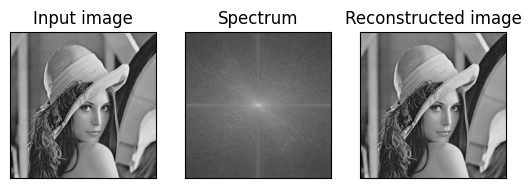

In [69]:
def inverse_spectre_fourier(spectre):
    # Step 1 : shift the zero-frequncy component to the corner of the spectrum
    dft_shift = np.fft.ifftshift(spectre)

    # Step 2 : compute the inverse DFT
    inv_dft = np.fft.ifft2(dft_shift)

    # Step 3 : compute the magnitude of the spectrum
    return np.abs(inv_dft)

ispectre = inverse_spectre_fourier(spectre)

eqm = np.mean((lena - ispectre)**2)
print("EQM : ", eqm)

subp(131, "Input image", lena)
subp(132, "Spectrum", np.log(np.abs(spectre)))
subp(133, "Reconstructed image", ispectre)
plt.show()

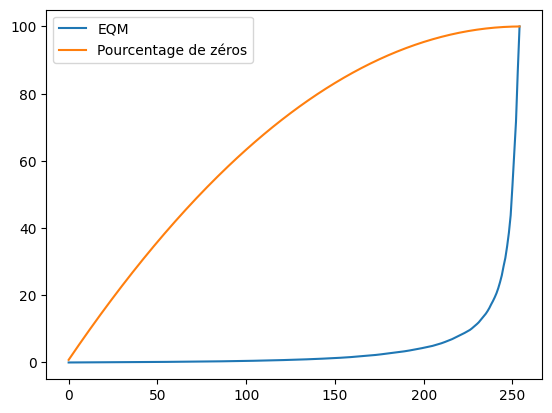

In [70]:
# n = 1;
# Tant que n < largeur_image/2 faire
#     Mettre à zéro les n première lignes, les dernière lignes, les n première colonnes et les n dernières colonnes du spectre en représentation conventionnelle
#     Calculer la transformée inverse pour produire l'image filtrée
#     Calculer l'Erreur Quadratique Moyenne entre l'image de départ et la nouvelle image filtrée
#     n = n + 1;
# Fin tant que.

def filtrage(spectre, n):
    spectre = spectre.copy()
    spectre[:n, :] = 0
    spectre[-n:, :] = 0
    spectre[:, :n] = 0
    spectre[:, -n:] = 0
    return spectre

def get_num_of_zeros(spectre):
    return np.sum(spectre == 0)

eqm_list = []
zero_list = []
n = 1
while n < lena.shape[0]//2:
    spectre_filtre = filtrage(spectre, n)
    ispectre_filtre = inverse_spectre_fourier(spectre_filtre)
    eqm_list.append( np.mean((lena - ispectre_filtre)**2) )
    zero_list.append( get_num_of_zeros(spectre_filtre) )
    n += 1

def to_percentage(arr):
    return np.array(arr) / np.max(arr) * 100

plt.plot(to_percentage(eqm_list))
plt.plot(to_percentage(zero_list))
plt.legend(["EQM", "Pourcentage de zéros"])
plt.show()

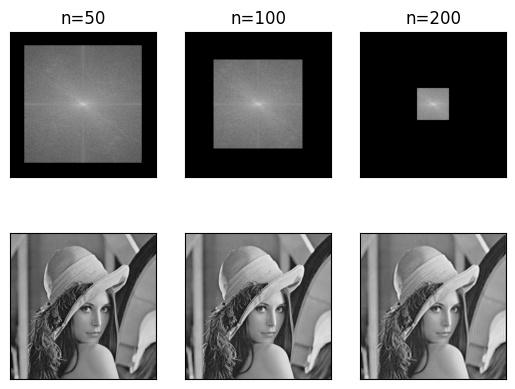

In [74]:
def show(n, i):
    spectre_n = filtrage(spectre, n)
    ispectre_n = inverse_spectre_fourier(spectre_n)


    subp(230+i, f"n={n}", np.log(np.abs(spectre_n)+1))
    subp(233+i, None, ispectre_n)


show(50, 1)
show(100, 2)
show(200, 3)
plt.show()

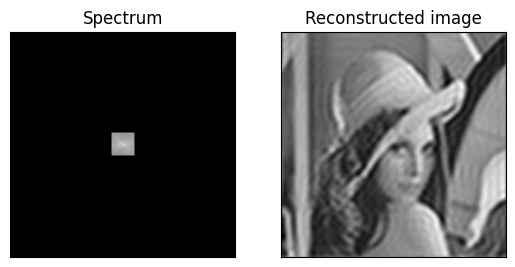

In [75]:
spectre_230 = filtrage(spectre, 230)
ispectre_230 = inverse_spectre_fourier(spectre_230)

subp(121, "Spectrum", np.log(np.abs(spectre_230)+1))
subp(122, "Reconstructed image", ispectre_230)

plt.show()